Text(0.5, 0, 'Z')

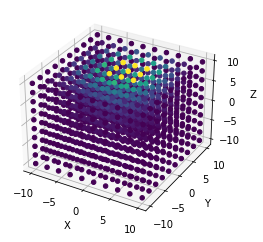

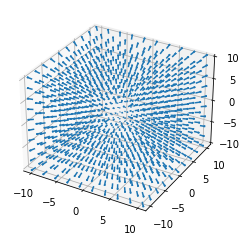

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import copy
num_iterations = int(1e5)

#V = np.random.rand(10,10,10)
V = np.zeros((10,10,10))
V[-1,:,:] = 0
V[0,:,:] = 0
V[:,-1,:] = 0
V[:,0,:] = 0
V[:,:,-1] = 0
V[:,:,0] = 0
V[4:7,4:7,-1]=1



for iteration in range(num_iterations):
    V_new = copy.deepcopy(V)
    for X in range(1,9):
        for Y in range(1,9):
            if V[X,Y,-1] != 1:
                V_new[X,Y,-1] = .25*(V[X+1,Y,-1]+V[X-1,Y,-1]+V[X,Y+1,-1]+V[X,Y-1,-1])
            for Z in range(8,0,-1):
                V_new[X,Y,Z] = 1/6*(V[X+1,Y,Z]+V[X-1,Y,Z]+V[X,Y+1,Z]+V[X,Y-1,Z]+V[X,Y,Z+1]+V[X,Y,Z-1])
    V = copy.deepcopy(V_new)
x,y,z=np.meshgrid(np.linspace(-10,10,10),np.linspace(-10,10,10),np.linspace(-10,10,10))

E = np.gradient(-1*V)
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(x,y,z,c=V,alpha=1)
bx = plt.figure().add_subplot(projection='3d')
bx.quiver(x,y,z,x+E[0],y+E[1],z+E[2],normalize=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#plt.show()


